In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
import matplotlib.pyplot as plt

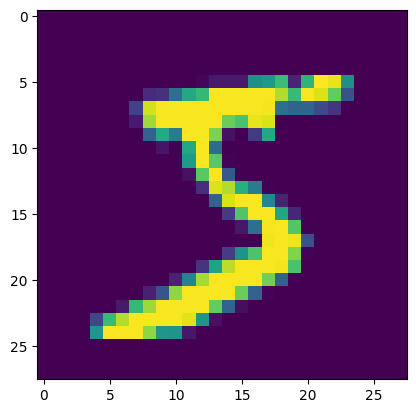

In [ ]:
plt.imshow(x_train[0])

In [ ]:
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8678 - loss: 0.4750 - val_accuracy: 0.9562 - val_loss: 0.1512
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9590 - loss: 0.1396 - val_accuracy: 0.9664 - val_loss: 0.1145
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9749 - loss: 0.0892 - val_accuracy: 0.9696 - val_loss: 0.1042
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9805 - loss: 0.0648 - val_accuracy: 0.9736 - val_loss: 0.0893
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0486 - val_accuracy: 0.9753 - val_loss: 0.0872
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9900 - loss: 0.0358 - val_accuracy: 0.9724 - val_loss: 0.0952
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9707 - val_loss: 0.0988
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0223 - 

In [ ]:
y_prob=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
y_prob

array([[3.4795034e-10, 5.4737583e-09, 1.9051711e-06, ..., 9.9948496e-01,
        8.9373880e-06, 5.0718714e-05],
       [1.2505798e-12, 8.6336037e-08, 9.9999970e-01, ..., 1.9836639e-19,
        1.3286488e-07, 3.6543963e-18],
       [1.4020569e-06, 9.9931866e-01, 3.2507561e-04, ..., 2.9218882e-05,
        3.2157681e-04, 2.1475611e-08],
       ...,
       [8.5192499e-16, 1.9755520e-11, 3.0347494e-15, ..., 3.2868192e-07,
        2.7167417e-09, 1.0040474e-06],
       [2.0002177e-11, 4.6853389e-16, 3.0663081e-13, ..., 7.5190467e-13,
        2.3476007e-06, 9.9678363e-15],
       [2.8298513e-11, 1.0802846e-15, 5.7918188e-12, ..., 4.0929921e-20,
        5.5323476e-13, 5.3489965e-14]], dtype=float32)

In [ ]:
y_pred=y_prob.argmax(axis=1)

In [ ]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9788

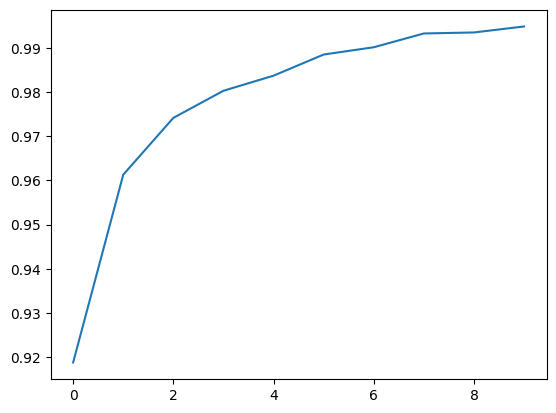

In [ ]:
plt.plot(hist.history['accuracy'])

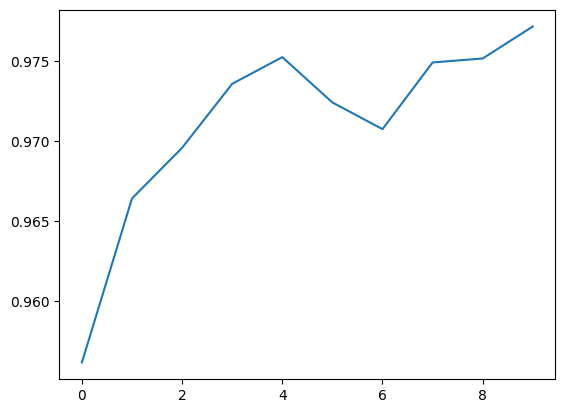

In [ ]:
plt.plot(hist.history['val_accuracy'])